<a href="https://colab.research.google.com/github/jdmartinezrs/incomesAndBillsProject/blob/main/Mision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Aca comieza dt

In [51]:
#Dataset de mantenimiento

import pandas as pd
dt = pd.read_excel("/content/drive/MyDrive/datasets mision1/mantenimiento.xlsm", header=5)
dt.shape
#sheet_id ='1hSCgq0sKpE_O2XI55UfuVPkA6lYoySZSCE7KWhdxWNY'
#sheet_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
#dt = pd.read_excel("/content/drive/MyDrive/datasets mision1/mantenimiento.xlsm")

#dt = pd.read_csv(sheet_url, header=5)


(36, 18)

In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt



In [53]:
print(dt.head(2))


  Fecha  ITEM CODIGO DE EQUIPO Tipo de Vehiculo fecha de revision  \
0   NaT   1.0  VE-DT-CH-XMD284     CARRO TANQUE        2025-05-23   
1   NaT   2.0  VE-DT-FL-XMD588      DOBLETROQUE        2025-05-23   

   Km/ Hr Plan Fecha Ult Pre-Operacional  Dias Pend  Ult Km/Hr  Km/Hr Cambio  \
0      10000.0                2025-05-20        3.0   320832.0      316580.0   
1      10000.0                2023-09-21      610.0   209543.0      199850.0   

  Fecha Cambio Fecha Prox Cambio Unnamed: 12  Km/Hr Proyectada  Km/Hr Pend  \
0   2024-06-21        2025-01-17  2025-08-15          326580.0      5748.0   
1   2023-07-11               NaT         NaT          209850.0       307.0   

   Progreso  Unnamed: 16 Observaciones   
0    0.5748        57.48          57.48  
1    0.0307          NaN            NaN  


In [64]:
#Ajuste el imputador a los datos y transforme las columnas
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dt['Km/Hr Pend'] = imputer.fit_transform(dt[['Km/Hr Pend']])
dt['Ult Km/Hr'] = imputer.fit_transform(dt[['Ult Km/Hr']])

In [65]:
# Now define y and x using the imputed data
y = dt['Km/Hr Pend'].values.reshape(-1, 1)
x = dt['Ult Km/Hr'].values.reshape(-1, 1)


In [66]:
# Proceed with your LinearRegression model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [67]:
# Print coefficients, make predictions, etc.
print("Coeficiente:", model.coef_)
print("Intercepción:", model.intercept_)

Coeficiente: [[0.00312893]]
Intercepción: [5427.17926385]


In [68]:
# Define los coeficientes y la intersección de tu modelo.
coeficiente = 0.00312893
intercepcion = 5427.17926385

**Coeficiente: [[0.00312893]]**

Este valor (0.00312893) representa la pendiente de la línea de regresión.
Significa que, por cada aumento de una unidad en Ult Km/Hr, se espera un aumento de aproximadamente 0.00312893 unidades en Km/Hr Pend.
En el contexto de tu data, esto sugiere una relación lineal positiva

**Intercepción: [5427.17926385]**

Este valor (5427.17926385) representa el punto donde la línea de regresión cruza el eje Y (cuando x es igual a 0).
En este caso, cuando Ult Km/Hr es 0, se espera que Km/Hr Pend sea aproximadamente 5427.18.


Ingrese la cantidad de kilometros recorridos: 50000
 El vehículo tiene aproximadamente 5583.62576385 Km restantes antes de su próximo mantenimiento.


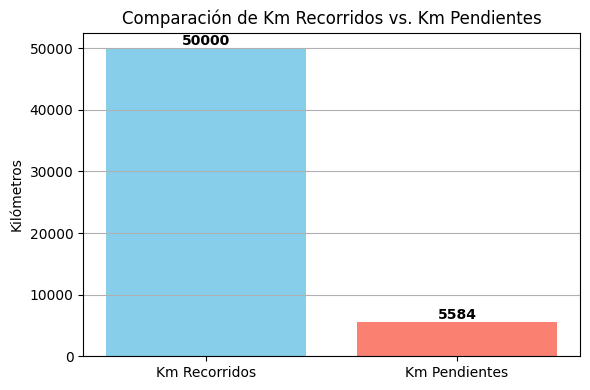

In [69]:
# Define la variable para el input de valor (Ult Km/Hr) Kilometraje recorrido
ult_km_hr_value = float(input('Ingrese la cantidad de kilometros recorridos: '))

# Calcule el Km/Hr Pend previsto utilizando la ecuación
km_hr_pend_predicho = (coeficiente * ult_km_hr_value) + intercepcion
print(f" El vehículo tiene aproximadamente {km_hr_pend_predicho} Km restantes antes de su próximo mantenimiento.")

#Visualizar el resultado
labels = ['Km Recorridos', 'Km Pendientes']
values = [ult_km_hr_value, km_hr_pend_predicho]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Comparación de Km Recorridos vs. Km Pendientes')
plt.ylabel('Kilómetros')
plt.grid(axis='y')

for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

El resultado Km/Hr Pend predicho: 6365.85826385 significa que, según tu modelo de regresión lineal, para un vehículo con 300,000 Kilómetros/Horas registrados (Ult Km/Hr), la cantidad esperada de Kilómetros/Horas pendientes (Km/Hr Pend) es aproximadamente 6365.86.

Contexto: La interpretación de este valor debe hacerse dentro del contexto de tus datos y lo que representan Km/Hr Pend y Ult Km/Hr. Si Km/Hr Pend indica cuánto falta para un próximo mantenimiento, entonces la predicción sugiere que un vehículo con 300,000 Km/Hr tiene aproximadamente 6365.86 Km/Hr restantes antes de su próximo mantenimiento.